<a href="https://colab.research.google.com/github/Dan-Analyst/RETAIL_SALES_ANALYSIS/blob/main/Retail_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#%% --------------------------
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
path="/content/drive/MyDrive/retail_sales_dataset/retail_sales_dataset.csv"
df=pd.read_csv(path)
print(df.head(10))




   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   
5               6  2023-04-25     CUST006  Female   45           Beauty   
6               7  2023-03-13     CUST007    Male   46         Clothing   
7               8  2023-02-22     CUST008    Male   30      Electronics   
8               9  2023-12-13     CUST009    Male   63      Electronics   
9              10  2023-10-07     CUST010  Female   52         Clothing   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30 

In [ ]:
# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


<ipython-input-4-833a67bce4e7>:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


In [ ]:
# Check data quality
print("Missing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())


Missing values:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Duplicate rows: 0


In [ ]:
# Basic data info
print("\nData types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())



Data types:
 Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

First 5 rows:
    Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100 

In [ ]:
# 2. Descriptive Statistics
# Numerical columns stats
num_cols = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
print("\nDescriptive Statistics:\n", df[num_cols].describe())


Descriptive Statistics:
               Age     Quantity  Price per Unit  Total Amount
count  1000.00000  1000.000000     1000.000000   1000.000000
mean     41.39200     2.514000      179.890000    456.000000
std      13.68143     1.132734      189.681356    559.997632
min      18.00000     1.000000       25.000000     25.000000
25%      29.00000     1.000000       30.000000     60.000000
50%      42.00000     3.000000       50.000000    135.000000
75%      53.00000     4.000000      300.000000    900.000000
max      64.00000     4.000000      500.000000   2000.000000


In [ ]:
# Categorical columns stats
cat_cols = ['Gender', 'Product Category']
for col in cat_cols:
    print(f"\n{col} distribution:\n{df[col].value_counts()}")


Gender distribution:
Gender
Female    510
Male      490
Name: count, dtype: int64

Product Category distribution:
Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


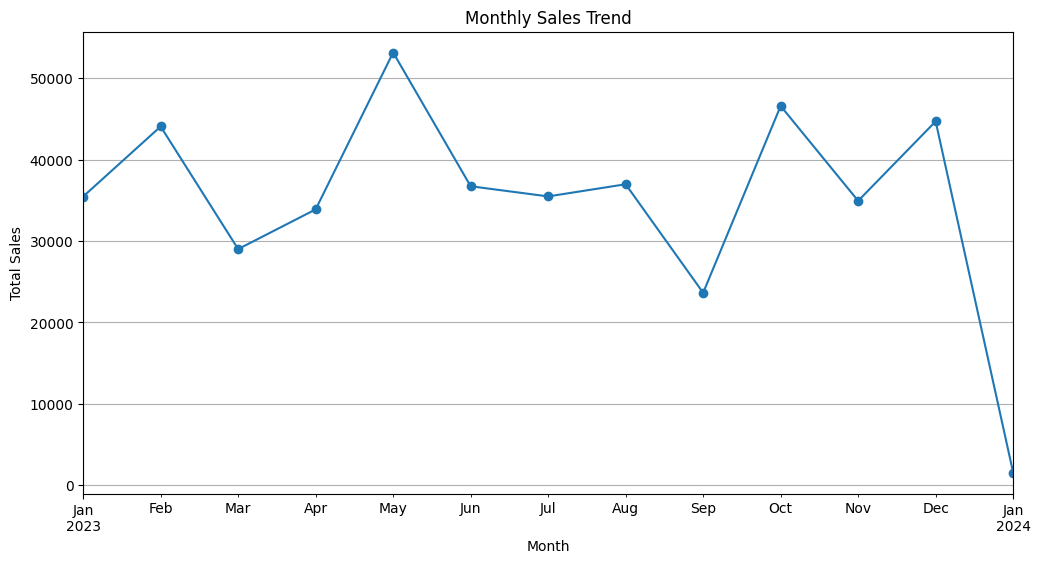

In [ ]:
# Convert 'Date' column to datetime
# because the dates in the data are in 'YYYY-MM-DD' format.
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# 3. Time Series Analysis
# Monthly sales trend
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total Amount'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.grid(True)
plt.show()

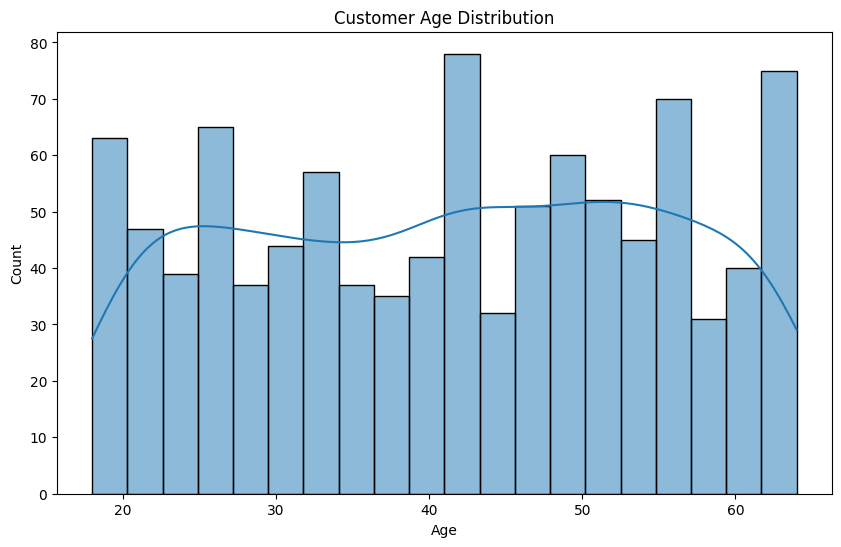

In [ ]:
# 4. Customer Analysis
# Age distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Customer Age Distribution')
plt.show()


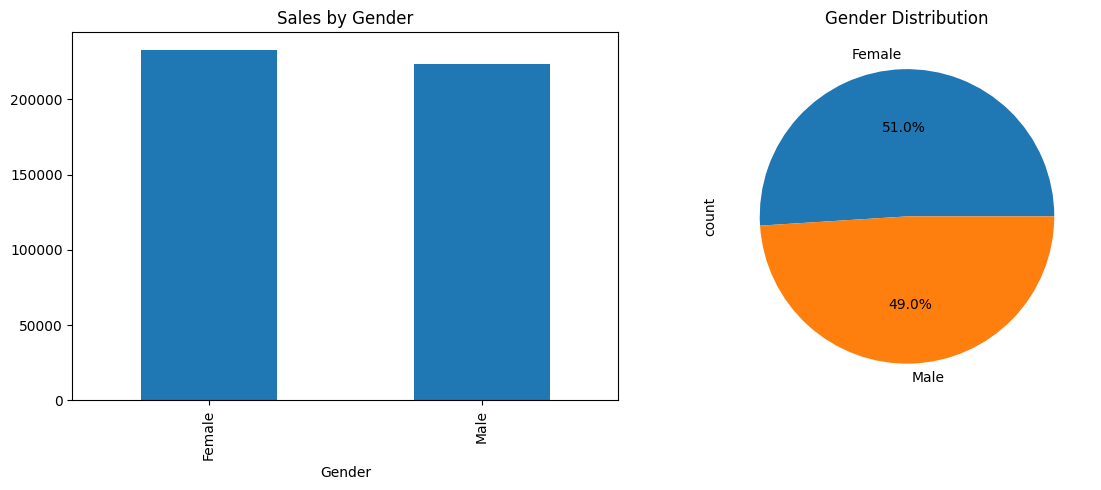

In [ ]:
# Gender analysis
gender_sales = df.groupby('Gender')['Total Amount'].sum()
gender_counts = df['Gender'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(12,5))
gender_sales.plot(kind='bar', ax=ax[0], title='Sales by Gender')
gender_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax[1], title='Gender Distribution')
plt.tight_layout()
plt.show()

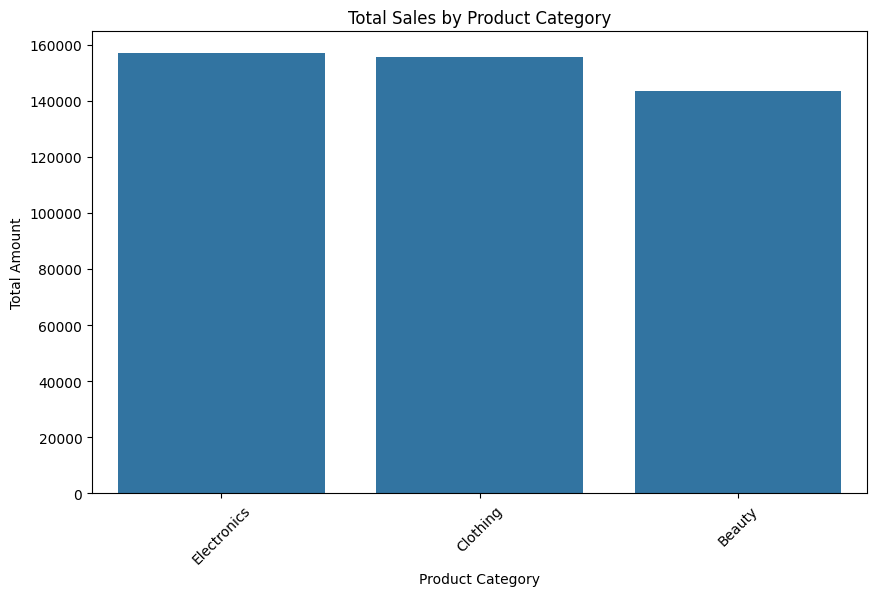

In [ ]:
# 5. Product Analysis
# Product category performance
product_analysis = df.groupby('Product Category').agg({
    'Quantity': 'sum',
    'Total Amount': 'sum'
}).sort_values('Total Amount', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=product_analysis.index, y='Total Amount', data=product_analysis)
plt.title('Total Sales by Product Category')
plt.xticks(rotation=45)
plt.show()

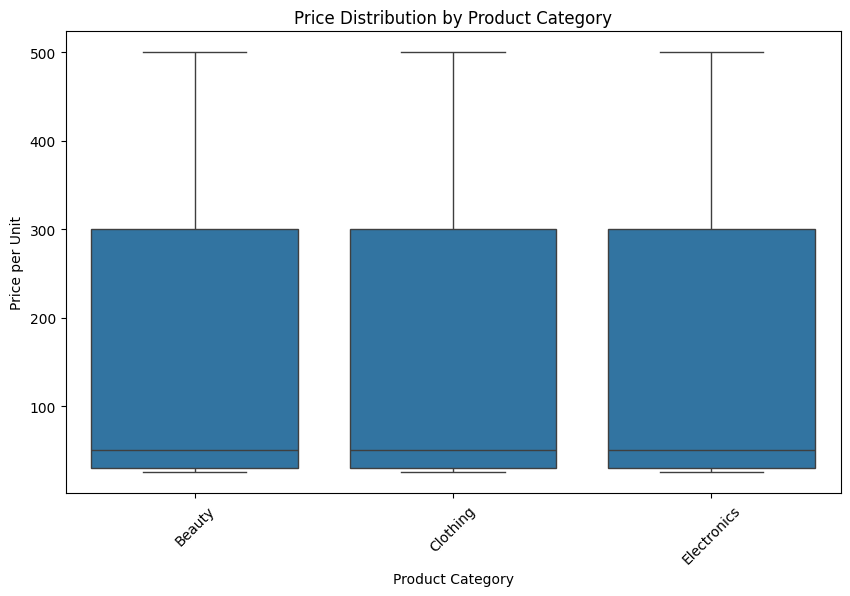

In [ ]:
# Price distribution by category
plt.figure(figsize=(10,6))
sns.boxplot(x='Product Category', y='Price per Unit', data=df)
plt.title('Price Distribution by Product Category')
plt.xticks(rotation=45)
plt.show()

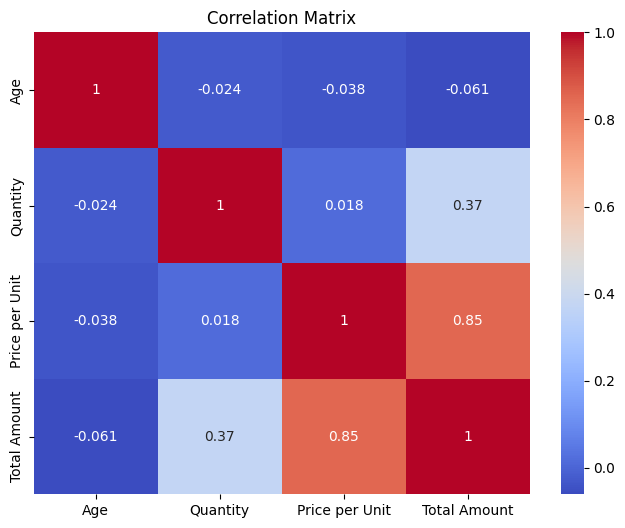

In [ ]:
# 6. Advanced Visualizations
# Correlation heatmap
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()